# **Lab 5 : Simpson’s 1/3 Rule and Simpson’s 3/8 Rule of Integration**<br>

Integration is the process of measuring the area under a function. This area actually corresponds to the anti-derivative of the function. For instance, a velocity function $v(t)$ can be obtained as a derivative of a distance function $S(t)$. Inversely, the integration of the velocity function $v(t)$ over a certain time period can give us the distance traveled over that time period. Performing integration analytically is a complex procedure, involving a lot of rules. Computers and calculators perform integration using some sort of numerical method, two of which are the **Simpson’s 1/3 Rule** and the **Simpson's 3/8 rule**.

In today's lab, we will be implementing the **Simpson’s 1/3 Rule** and the **Simpson's 3/8 rule** of integration in python.

The **Simpson’s 1/3 rule** is an extension of Trapezoidal rule where the integrand is approximated by a
second order polynomial $f_2(x)$. We can also define a multiple-segment version of this rule that divides the interval into $n$ equal segments, where $n$ is a multiple of $2$. The formula for **multi-segment Simpson's 1/3 rule** is,
<br>
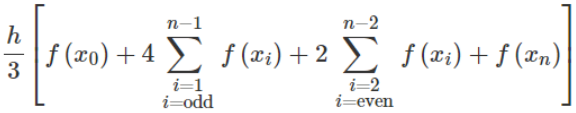
<br>
where $h=\frac{b-a}{n}$ is the step size.


In the case of **Simpson’s 3/8 rule**, we use a third order polynomial $f_3(x)$.We can also define a multiple-segment version of this rule that divides the interval into $n$ equal segments, where $n$ is a multiple of $3$. The formula for **multi-segment Simpson's 3/8 rule** is,
<br>
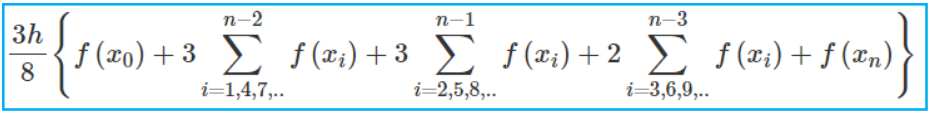
<br>
where $h=\frac{b-a}{n}$ is the step size.


Today we'll use these two rules to find the distance covered by a rocket from time $t = 8$s to $t = 30$s. The velocity function of the rocket is given as $$v(t) = 2000\ln\left[ \frac{140000}{140000-2100t} \right] - 9.8t$$


##Task 1
Implement a function that takes the time $t$ as an argument and returns the velocity $v(t)$ based on the given velocity function.

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [ ]:
def velocity(t):
    # Write your implementation here.
    return ((2000 * np.log (140000 / (140000 - 2100 * t))) - 9.8 * t)

In [ ]:
print(f'v(8) = {velocity(8)}m/s')
print(f'v(30) = {velocity(30)}m/s')

v(8) = 177.26674301977m/s
v(30) = 901.6740015112407m/s


The velocity at $t=8$s should be $177.27ms^{-1}$.

The velocity at $t=30$s should be $901.67ms^{-1}$.

Use the `scipy.integrate.quad()` function or any other python package's function (*e.g.* `sympy`, `numpy`) to compute the exact value of the aforementioned integral.

Skim thorugh the documentation of `scipy.integrate.quad()` if needed: https://docs.scipy.org/doc/scipy/tutorial/integrate.html#general-integration-quad

In [ ]:
def exact_integral(function, lower, upper):
    # Write your implementation here.
     res, err = quad(function, lower, upper)
     return res

In [ ]:
print(f'True Value: {exact_integral(velocity,8,30)}')

True Value: 11061.335535080994


The exact value of the integral should be $I_{exact} \approx 11061.34$.

## Task 2
Complete the following `MultiSimpson1by3()` function that takes number of segments $n$ and the time interval $(t_{min}, t_{max})$ as arguments and returns the distance covered within this interval. Your function should also check for the validity of the number of segments.

In [ ]:
def MultiSimpson1by3(n, tmin, tmax):
    # Write your implementation here.
    if n % 2 != 0:
        raise ValueError("The number of segments n must be even.")

    h = (tmax - tmin) / n

    res = 0
    res += velocity(tmin)

    for i in range (1, n, 2):
        res += 4 * velocity(tmin + i * h)
    for i in range (2, n-1, 2):
        res += 2 * velocity(tmin + i * h)
    res += velocity(tmax)

    res = res * h /3
    return res

In [ ]:
def absolute_relative_true_error(true, approx):
    # Write your implementation here.
    error = abs((true - approx)/true) *100

    return error

In [ ]:
print(f'Non-composite Simpson\'s 1/3 Approximate Value: {MultiSimpson1by3(2,8,30)}') # n = 2, for non-composite
print(f'Absolute Relative True Error: {absolute_relative_true_error(exact_integral(velocity,8,30),MultiSimpson1by3(2,8,30))}%')

Non-composite Simpson's 1/3 Approximate Value: 11065.716327732167
Absolute Relative True Error: 0.03960455441640838%


The non-composite Simpson's 1/3 approximation should be $I \approx 11065.72$.

The absolute relative true error should be $|\epsilon_t| \approx 0.0396\%$.

Use your previously implemented `MultiSimpson1by3()` function and use increasing number of segments, starting from $2$ to $10$ and show the absolute relative true error $|\epsilon_t|$ at each step. Plot a graph showing the absolute relative true error $|\epsilon_t|$ vs number of segments $n$.

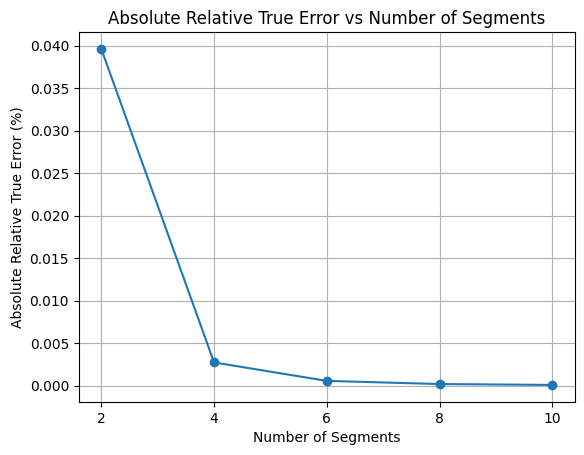

In [ ]:
#Your code here
true_value = exact_integral(velocity, 8, 30)

n_values = list(range(2, 11,2))
errors = []

for n in n_values:
    approx_value = MultiSimpson1by3(n, 8,30)
    error = absolute_relative_true_error(true_value, approx_value)
    errors.append(error)

# Plotting the results
plt.plot(n_values, errors, marker='o')
plt.title('Absolute Relative True Error vs Number of Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Absolute Relative True Error (%)')
plt.xticks(np.arange(2, 11, step=2))
plt.grid(True)
plt.show()


## Task 3
Complete the following `MultiSimpson3by8()` function that takes number of segments $n$ and the time interval $(t_{min}, t_{max})$ as arguments and returns the distance covered within this interval. Your function should also check for the validity of the number of segments.

In [ ]:
def MultiSimpson3by8(n, tmin, tmax):
    # Write your implementation here.
    if(n%3!=0):
      raise ValueError("n must be a multiple of 3 for 3/8 rule")

    h=(tmax-tmin)/n
    res=0
    res += velocity(tmin)
    for i in range (1, n-1, 3):
        res += 3 * velocity(tmin+ i * h)
    for i in range(2, n, 3):
        res += 3 * velocity(tmin+ i * h)
    for i in range(3, n-2, 3):
        res += 2 * velocity(tmin + i * h)


    res += velocity(tmax)
    res *= 3 * h / 8

    return res

In [ ]:
print(f'Non-composite Simpson\'s 3/8 Approximate Value: {MultiSimpson3by8(3,8,30)}') # n = 3, for non-composite
print(f'Absolute Relative True Error: {absolute_relative_true_error(exact_integral(velocity,8,30),MultiSimpson3by8(3,8,30))}%')

Non-composite Simpson's 3/8 Approximate Value: 11063.31048104549
Absolute Relative True Error: 0.017854498294820574%


The non-composite Simpson's 3/8 approximation should be $I \approx 11063.3104$.

The absolute relative true error should be $|\epsilon_t| \approx 0.000178\%$.

Use your previously implemented `MultiSimpson3by8()` function and use increasing number of segments, starting from $3$ to $15$ and show the absolute relative true error $|\epsilon_t|$ at each step. Plot a graph showing the absolute relative true error $|\epsilon_t|$ vs number of segments $n$.

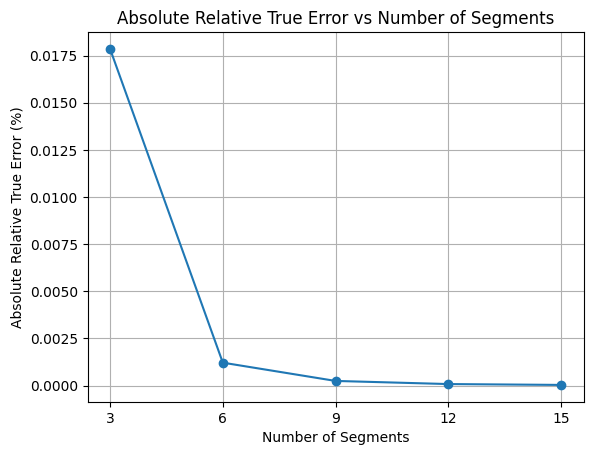

In [ ]:
#Your code here
true_value = exact_integral(velocity, 8, 30)

n_values = list(range(3, 16,3))
errors = []

for n in n_values:
    approx_value = MultiSimpson3by8(n, 8,30)
    error = absolute_relative_true_error(true_value, approx_value)
    errors.append(error)

# Plotting the results
plt.plot(n_values, errors, marker='o')
plt.title('Absolute Relative True Error vs Number of Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Absolute Relative True Error (%)')
plt.xticks(np.arange(3, 16, step=3))
plt.grid(True)
plt.show()